In [137]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import csv

In [138]:
np.random.seed(238746)

import warnings
warnings.filterwarnings('ignore')


In [139]:
# select the style from fivethityeight website
mpl.rcdefaults()
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams.update({'font.size': 16})

np.random.seed(238746)

In [140]:
wiseairdata=pd.read_csv(r"C:\Users\neg\PycharmProjects\AirQualityForecasting\wiseairdata.csv")

In [141]:
wiseairdata.head()

,created_at,id,location_id,pot_id,pm2p5,pm10,pm1SPS,pm2p5SPS,pm4SPS,pm10SPS,...,rssi_dbm,consecutive_successful_measures,consecutive_failed_measures,temperature_sht,humidity_sht,semver,firmware_version_id,seconds_until_next_measure,anomaly,is_healthy
0,2020-09-04 22:23:31,644775,99,1157,10,9.93,9.39,10,9.93,9.93,...,-52,0.0,0.0,-9.05,20.52,0.3.20,349,300,0,0
1,2020-09-04 22:25:28,644783,99,1157,13,13.26,12.54,13,13.26,13.26,...,-62,0.0,0.0,-7.86,17.70,0.3.28,357,300,0,0
2,2020-09-04 22:30:15,644822,99,1157,14,14.06,13.30,14,14.06,14.06,...,-54,1.0,0.0,-8.53,29.28,0.3.28,357,300,0,0
3,2020-09-04 22:35:14,644858,99,1157,13,13.49,12.75,13,13.49,13.49,...,-51,2.0,0.0,-8.60,26.16,0.3.28,357,300,0,0
4,2020-09-04 22:40:14,644871,99,1157,14,14.04,13.28,14,14.04,14.04,...,-50,3.0,0.0,-8.67,25.66,0.3.28,357,300,0,0


In [142]:
wiseairdata.created_at = pd.to_datetime(wiseairdata.created_at)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478787 entries, 0 to 478786
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   created_at                       478787 non-null  object 
 1   id                               478787 non-null  int64  
 2   location_id                      478787 non-null  int64  
 3   pot_id                           478787 non-null  int64  
 4   pm2p5                            478787 non-null  int64  
 5   pm10                             478787 non-null  float64
 6   pm1SPS                           478787 non-null  float64
 7   pm2p5SPS                         478787 non-null  int64  
 8   pm4SPS                           478787 non-null  float64
 9   pm10SPS                          478787 non-null  float64
 10  millisSpentMeasuring             478785 non-null  float64
 11  millisSpentConnecting            478785 non-null  float64
 12  mi

In [143]:
data=wiseairdata

In [144]:
data.set_index('created_at', inplace=True)
data.head()

,id,location_id,pot_id,pm2p5,pm10,pm1SPS,pm2p5SPS,pm4SPS,pm10SPS,millisSpentMeasuring,...,rssi_dbm,consecutive_successful_measures,consecutive_failed_measures,temperature_sht,humidity_sht,semver,firmware_version_id,seconds_until_next_measure,anomaly,is_healthy
created_at,,,,,,,,,,,,,,,,,,,,,
2020-09-04 22:23:31,644775,99,1157,10,9.93,9.39,10,9.93,9.93,11370.0,...,-52,0.0,0.0,-9.05,20.52,0.3.20,349,300,0,0
2020-09-04 22:25:28,644783,99,1157,13,13.26,12.54,13,13.26,13.26,11370.0,...,-62,0.0,0.0,-7.86,17.70,0.3.28,357,300,0,0
2020-09-04 22:30:15,644822,99,1157,14,14.06,13.30,14,14.06,14.06,11370.0,...,-54,1.0,0.0,-8.53,29.28,0.3.28,357,300,0,0
2020-09-04 22:35:14,644858,99,1157,13,13.49,12.75,13,13.49,13.49,11370.0,...,-51,2.0,0.0,-8.60,26.16,0.3.28,357,300,0,0
2020-09-04 22:40:14,644871,99,1157,14,14.04,13.28,14,14.04,14.04,11369.0,...,-50,3.0,0.0,-8.67,25.66,0.3.28,357,300,0,0


In [145]:
dati=data.loc[data['pot_id'].isin([1103,1109,1116,1094,1095])]
print(dati)

                          id  location_id  pot_id  pm2p5   pm10  pm1SPS  \
created_at                                                                
2020-07-15 13:38:47   245728           99    1103     13  13.99   11.47   
2020-07-15 13:40:48   245742           99    1103     13  13.27   12.55   
2020-07-15 13:45:17   245768           99    1103     15  14.91   14.10   
2020-07-15 13:50:16   245820           99    1103     18  17.75   16.79   
2020-07-15 13:55:16   245850           99    1103     17  17.04   16.11   
...                      ...          ...     ...    ...    ...     ...   
2020-10-15 23:00:20  1053824          945    1116     19  22.74   21.51   
2020-10-15 23:15:25  1053919          945    1116     23  31.84   22.23   
2020-10-15 23:15:28  1053949          945    1116     23  31.84   22.23   
2020-10-15 23:30:21  1054002          945    1116     18  23.41   19.93   
2020-10-15 23:45:20  1054066          945    1116     20  24.74   21.36   

                     pm2

In [148]:
print(wiseairdata)

                         id  location_id  pot_id  pm2p5   pm10  pm1SPS  \
created_at                                                               
2020-09-04 22:23:31  644775           99    1157     10   9.93    9.39   
2020-09-04 22:25:28  644783           99    1157     13  13.26   12.54   
2020-09-04 22:30:15  644822           99    1157     14  14.06   13.30   
2020-09-04 22:35:14  644858           99    1157     13  13.49   12.75   
2020-09-04 22:40:14  644871           99    1157     14  14.04   13.28   
...                     ...          ...     ...    ...    ...     ...   
2020-09-03 14:44:19  633812          856    1010      6   6.42    6.19   
2020-09-03 14:46:18  633861          856    1010      8   9.16    6.50   
2020-09-03 14:48:20  633870          856    1010      5   5.14    4.96   
2020-09-03 14:50:19  633878          856    1010      8  10.59    6.01   
2020-09-03 14:52:19  633891          856    1010      9   9.56    9.22   

                     pm2p5SPS  pm4SPS

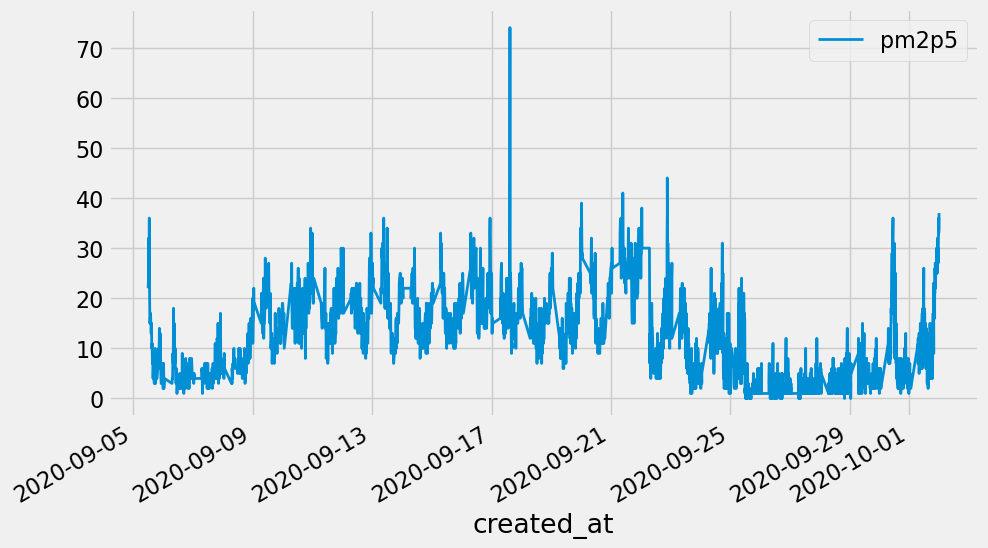

In [146]:
dati['pm2p5']['2020-09-01':'2020-10-01'].plot(subplots=True, figsize=(10,6))
plt.legend()
plt.show()

In [149]:
wiseairdata['month'] = [d.strftime('%b') for d in wiseairdata.index]

In [ ]:
print(wiseairdata)

In [150]:
wiseair_pot_id=wiseairdata.loc[wiseairdata['pot_id'].isin([1103,1109,1116,1094,1095])]
data_pot_id=wiseair_pot_id['pot_id'].unique()

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(data_pot_id), replace=False)

In [151]:
print(data_pot_id)

[1103 1109 1094 1116]


In [152]:
wiseairdata = wiseairdata['2020-09-29':'2020-09-30']

wiseairdata['hour'] = [d.strftime('%H') for d in wiseairdata.index]


In [153]:
print(wiseairdata)

                         id  location_id  pot_id  pm2p5   pm10  pm1SPS  \
created_at                                                               
2020-09-29 00:00:17  864176          479    1157      7  12.34    0.98   
2020-09-29 00:10:17  864210          479    1157      1   0.83    0.79   
2020-09-29 00:29:20  864266          479    1157      1   1.52    0.72   
2020-09-29 00:48:24  864375          479    1157      1   0.87    0.82   
2020-09-29 01:00:17  864412          479    1157      1   0.94    0.89   
...                     ...          ...     ...    ...    ...     ...   
2020-09-30 22:45:18  883555          670    1028      3   3.14    2.97   
2020-09-30 23:00:18  883848          670    1028      3   3.37    2.94   
2020-09-30 23:15:17  884143          670    1028      3   3.88    2.42   
2020-09-30 23:30:18  884415          670    1028      5   9.19    2.56   
2020-09-30 23:45:18  884702          670    1028      3   3.16    2.99   

                     pm2p5SPS  pm4SPS

In [171]:

wiseair_pot_id=wiseairdata.loc[wiseairdata['pot_id'].isin([1103,1109,1157])]

data_pot_id=wiseair_pot_id['pot_id'].unique()

mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(data_pot_id), replace=False)

In [172]:
print(data_pot_id)

# ragruppa i dati in base al pot_id
wiseair_avg = wiseair_pot_id.groupby('pot_id', as_index=False)

[1157 1103 1109]


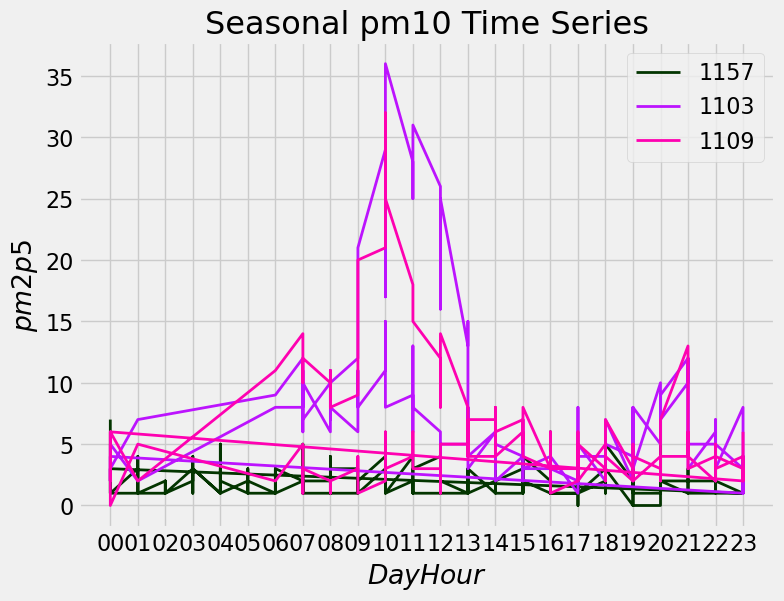

In [176]:
plt.figure(figsize=(8,6))    
for i, y in enumerate(data_pot_id):
    # fai la media giornaliera per il pot y
    # aggiungi una colonna day per questo gruppo
    plt.plot('hour', 'pm2p5', data=wiseairdata.loc[wiseairdata.pot_id==y, :], color=mycolors[i], label=y)
        
plt.gca().set( ylabel='$pm2p5$', xlabel='$DayHour$')
plt.title("Seasonal pm10 Time Series")
plt.legend()
plt.show()